Download Dataset

In [3]:
!wget --no-check-certificate \
https://github.com/yooerizkilab/TubesAI-Dataset-Fruits/raw/master/Dataset.zip \
  -O /tmp/Dataset.zip

--2021-12-31 06:53:02--  https://github.com/yooerizkilab/TubesAI-Dataset-Fruits/raw/master/Dataset.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yooerizkilab/TubesAI-Dataset-Fruits/master/Dataset.zip [following]
--2021-12-31 06:53:03--  https://raw.githubusercontent.com/yooerizkilab/TubesAI-Dataset-Fruits/master/Dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6254063 (6.0M) [application/zip]
Saving to: ‘/tmp/Dataset.zip’

/tmp/Dataset.zip    100%[===================>]   5.96M  --.-KB/s    in 0.1s    

2021-12-31 06:53:03 (51.8 MB/s) - ‘/tmp/Dataset.zip’ saved [6254063/6254063]


In [4]:
import os

Mount data

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Extrak file dataset

In [5]:
import os
import zipfile

local_zip = '/tmp/Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/Dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

Cek data

In [6]:
apple_train_path = train_dir + '/apple'
mango_train_pat = train_dir + '/mango'
apple_val_path = val_dir + '/apple'
mango_val_path = val_dir + '/mango'

apple_len_train = len(os.listdir(apple_train_path))
mango_len_train = len(os.listdir(mango_train_pat))
apple_len_val = len(os.listdir(apple_val_path))
mango_len_val = len(os.listdir(mango_val_path))

print("jumlah dataset Training : ", apple_len_train + mango_len_train)
print("jumlah dataset validasi : ", apple_len_val + mango_len_val)
print("\n\n")
print("jumlah train kelas Apple : ", apple_len_train)
print("jumlah train kelas Mango : ", mango_len_train)
print("jumlah validasi kelas Apple : ", apple_len_val)
print("jumlah validasi kelas Mango : ", mango_len_val)

jumlah dataset Training :  100
jumlah dataset validasi :  40



jumlah train kelas Apple :  50
jumlah train kelas Mango :  50
jumlah validasi kelas Apple :  20
jumlah validasi kelas Mango :  20


Augmentasi

In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 100 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dropout, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [13]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))

#-----------------------------------#
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))

model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))

model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))

model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(GlobalAveragePooling2D())

#------------------------------------#

# Fully Connected Layer
model.add(Flatten())
model.add(Dropout(0.0001))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.0001))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(units=2, activation='softmax'))


# Print model summary
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 average_pooling2d_12 (Avera  (None, 75, 75, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 average_pooling2d_13 (Avera  (None, 38, 38, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_14 (Conv2D)          (None, 38, 38, 128)       73856     
                                                                 
 average_pooling2d_14 (Avera  (None, 19, 19, 128)     

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# setting Callback so we can save the best model in format h5 and i save it in my drive
callbacks = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='auto')        
directory_to_save_best_model_file = '/content/drive/MyDrive/Colab Notebooks/Tubes/model_drop_batch_weight_from_callback.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

history = model.fit(
      train_generator,
      steps_per_epoch=4,  # images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=2,  #  images = batch_size * steps
)

Epoch 1/100
4/4 [==============================] - 12s 3s/step - loss: 0.6958 - acc: 0.4875 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 2/100
4/4 [==============================] - 11s 3s/step - loss: 0.6923 - acc: 0.5875 - val_loss: 0.6905 - val_acc: 0.5000
Epoch 3/100
4/4 [==============================] - 11s 3s/step - loss: 0.6915 - acc: 0.4750 - val_loss: 0.6891 - val_acc: 0.5250
Epoch 4/100
4/4 [==============================] - 11s 3s/step - loss: 0.6925 - acc: 0.4875 - val_loss: 0.6874 - val_acc: 0.5000
Epoch 5/100
4/4 [==============================] - 11s 3s/step - loss: 0.6862 - acc: 0.5375 - val_loss: 0.6852 - val_acc: 0.5000
Epoch 6/100
4/4 [==============================] - 11s 3s/step - loss: 0.6821 - acc: 0.5625 - val_loss: 0.6825 - val_acc: 0.5000
Epoch 7/100
4/4 [==============================] - 11s 3s/step - loss: 0.6840 - acc: 0.5000 - val_loss: 0.6790 - val_acc: 0.5000
Epoch 8/100
4/4 [==============================] - 11s 3s/step - loss: 0.6800 - acc: 0.5125 - val

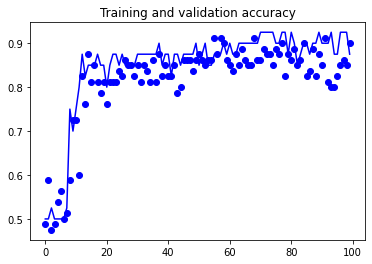

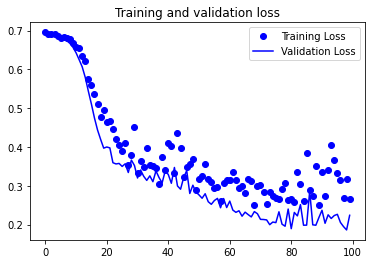

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and validation loss')

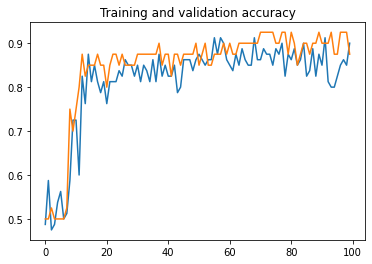

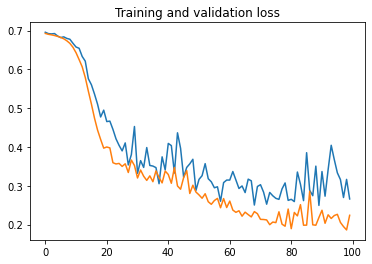

In [ ]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
sns.set(style='whitegrid')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Accuracy  : 0.325
Precision : 0.3133333333333333
f1Score : 0.3142857142857143
[[ 4 16]
 [11  9]]


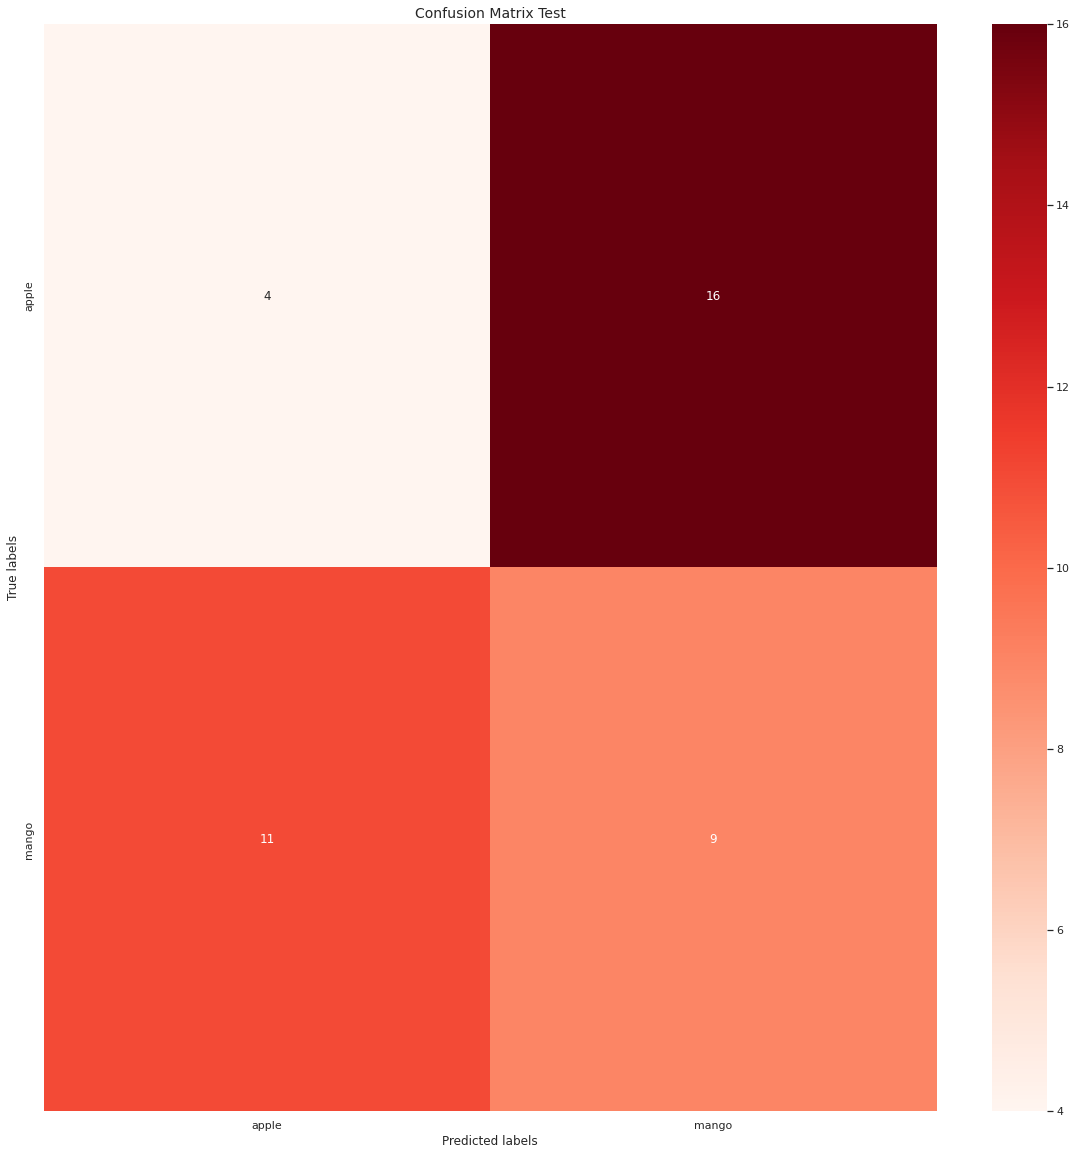

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score


predictions = model.predict_generator(generator=validation_generator)
yPredictions = predictions > 0.5
true_classes = validation_generator.classes
class_names = validation_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

              precision    recall  f1-score   support

       apple       0.27      0.20      0.23        20
       mango       0.36      0.45      0.40        20

    accuracy                           0.33        40
   macro avg       0.31      0.33      0.31        40
weighted avg       0.31      0.33      0.31        40

